# Import essential libraries

In [ ]:
  # Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Load the data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


OSError: ignored

In [ ]:
import io
 
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
df

NameError: ignored

In [ ]:
titanic = df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
titanic

# Exploratory Data Analysis

## General

`df.describe()` shows a table with statistical summary for numerical data

In [ ]:
titanic.describe()

`df.info()` shows the number of non-null data point in each column. It also shows the data type of each columns

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


`df.shape` shows the number of rows and the number of columns in the dataframe. The first number is always the row and the second number is always the column

In [ ]:
titanic.shape

(891, 8)

`df.nunique()` shows the number of unique values for each column

In [ ]:
titanic.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

## Data visualization for each variable

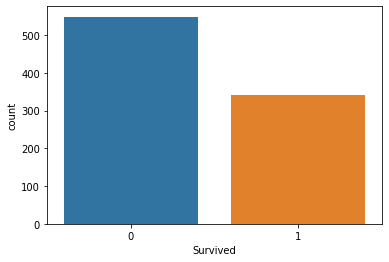

In [ ]:
sns.countplot(data = titanic, x='Survived')

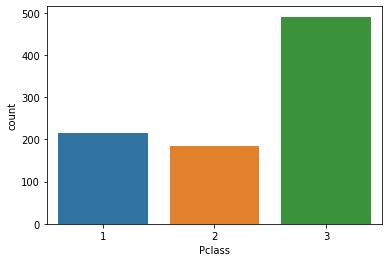

In [ ]:
sns.countplot(data = titanic, x='Pclass')

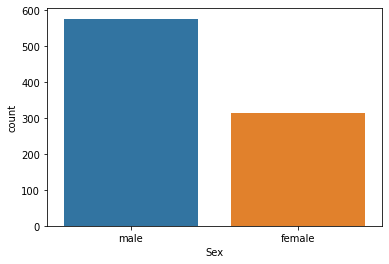

In [ ]:
sns.countplot(data=titanic, x='Sex')

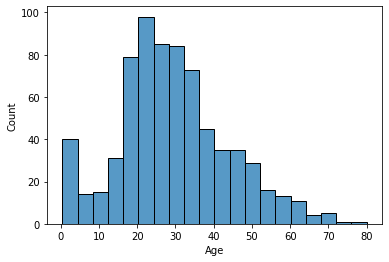

In [ ]:
sns.histplot(data=titanic, x='Age')

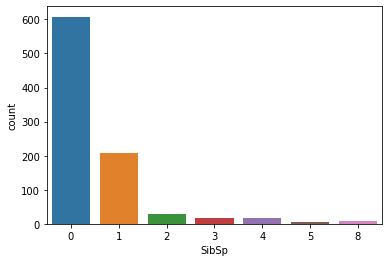

In [ ]:
sns.countplot(data = titanic, x = 'SibSp')

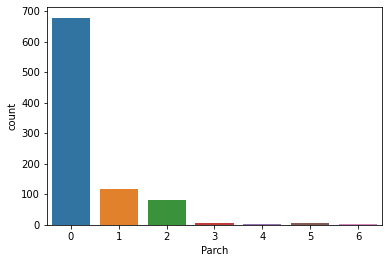

In [ ]:
sns.countplot(data = titanic, x = 'Parch')

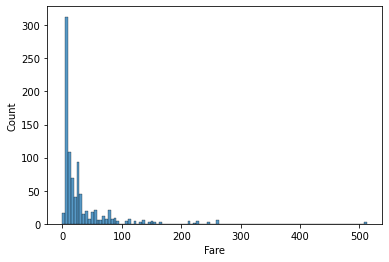

In [ ]:
sns.histplot(data=titanic, x='Fare')

In [ ]:
sns.countplot(data=titanic, x='Embarked')

## Data visualization for correlation

In [ ]:
sns.countplot(data = titanic, x='Survived', hue = 'Sex')

In [ ]:
sns.histplot(data = titanic, x='Age', hue='Survived')

In [ ]:
sns.kdeplot(data = titanic, x='Age', hue='Survived')

# Machine Learning

## Manipulate the data

In [ ]:
titanic = df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
titanic = titanic.dropna()

In [ ]:
# titanic.loc[ titanic['Age'] <= 16, 'Age'] = 0
# titanic.loc[(titanic['Age'] > 16) & (titanic['Age'] <= 32), 'Age'] = 1
# titanic.loc[(titanic['Age'] > 32) & (titanic['Age'] <= 48), 'Age'] = 2
# titanic.loc[(titanic['Age'] > 48) & (titanic['Age'] <= 64), 'Age'] = 3
# titanic.loc[ titanic['Age'] > 64, 'Age'] = 4

In [ ]:
titanic = pd.get_dummies(titanic, drop_first = True)

## Split the dataset

In [ ]:
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']
columns = X.columns

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

## Feature Importance

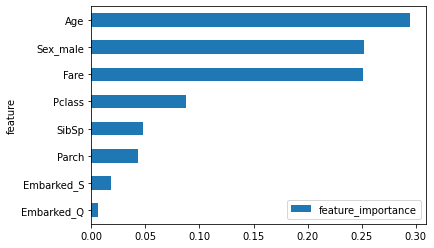

In [ ]:
feature_importance_df = pd.DataFrame({'feature': columns, 'feature_importance':model.feature_importances_}).sort_values(by='feature_importance', ascending=True)
feature_importance_df.plot(kind='barh', x='feature', y='feature_importance')